##5 classes: rock, metal, country, hip hop, disco




In [1]:
#importing google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
#setting the working directory
%cd /gdrive/MyDrive/Colab Notebooks/NAML/Project

/gdrive/MyDrive/Colab Notebooks/NAML/Project


In [3]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import librosa
import os

tfk = tf.keras
tfkl = tf.keras.layers
seed = 42

In [4]:
dataset = []
# genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

genres = { 'country': 0, 'disco': 1, 'hiphop': 2,  'metal': 3,  'rock': 4, 'classical':5}

n_genres=5

for genre, genre_number in genres.items():
    for filename in os.listdir(f'dataset_old/genres/{genre}'):
        songname = f'dataset_old/genres/{genre}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=29.7)
        ps = librosa.feature.melspectrogram(y=y, sr=sr, hop_length = 256, n_fft = 512)
        ps = librosa.power_to_db(ps**2)
        dataset.append( (ps, genre_number) )
    print(str(genre+' done'))

country done
disco done
hiphop done
metal done
rock done
classical done


In [5]:
order = np.arange(start = 0, stop = 100, step = 1)

np.random.seed(42)

training = []
validation = []
test = []

for i in range(5):
  shuffle = np.random.permutation(order)
  for k in range(70):
    training.append(dataset[i*100 + shuffle[k]])
  for l in range(20):
    validation.append(dataset[i*100 + shuffle[l+70]])
  for m in range(10):
    test.append(dataset[i*100 + shuffle[m+90]])

#dirt the dataset 
i=5
t=3 #wrong songs added to training 
v=1 #wrong songs added to validation

for j in range(5):
    for k in range(t):
        training.append((dataset[i*100+k+j*(t+v)][0],j))
    for l in range(v):
        validation.append((dataset[i*100+l+t+j*(t+v)][0],j))

# accuracy on test set 
# 3 e 1: 80%, 76%, 80%
# 5 e 2: 82%, 78%, 82%
# 7 e 3: 32%, 56%, 58%
# 8 e 3: 68%, 78%, 76%
# 10 e 3: 82%, 73%, 68%



In [6]:
X_train, Y_train = zip(*training)
X_valid, Y_valid = zip(*validation)
X_test, Y_test = zip(*test)

X_train = np.array([x.reshape( (128, 2559, 1) ) for x in X_train])
X_valid = np.array([x.reshape( (128, 2559, 1) ) for x in X_valid])
X_test = np.array([x.reshape( (128, 2559, 1) ) for x in X_test])

Y_train = np.array(tfk.utils.to_categorical(Y_train, n_genres))
Y_valid = np.array(tfk.utils.to_categorical(Y_valid, n_genres))
Y_test = np.array(tfk.utils.to_categorical(Y_test, n_genres))

###As before but rect filt

In [7]:
def build_model_1(input_shape, n_units):
# Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    conv1 = tfkl.Conv2D(
        filters=4,
        kernel_size=(3, 5),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(input_layer)
    conv1_2 = tfkl.Conv2D(
        filters=8,
        kernel_size=(2, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv1)
    pool1 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv1_2)

    conv2 = tfkl.Conv2D(
        filters=16,
        kernel_size=(2, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool1)
    conv2_2 = tfkl.Conv2D(
        filters=16,
        kernel_size=(2, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv2)
    pool2 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv2_2)

    conv3 = tfkl.Conv2D(
        filters=32,
        kernel_size=(2, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool2)
    pool3 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv3)

    conv4 = tfkl.Conv2D(
        filters=64,
        kernel_size=(2, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool3)
    conv4_2 = tfkl.Conv2D(
        filters=64,
        kernel_size=(2, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(conv4)
    pool4 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv4_2)

    conv5 = tfkl.Conv2D(
        filters=128,
        kernel_size=(2, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool4)
    pool5 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv5)

    conv6 = tfkl.Conv2D(
        filters=286,
        kernel_size=(1,2),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(pool5)
    

    global_average = tfkl.GlobalAveragePooling2D(name = 'GAP')(conv6)
    global_average = tfkl.Dropout(0.3, seed=seed)(global_average)
    
    classifier_layer = tfkl.Dense(units=64, name='Classifier', activation='relu')(global_average)
    #flattening_layer = tfkl.Flatten(name='Flatten')(pool5)
    #flattening_layer = tfkl.Dropout(0.2, seed=seed)(flattening_layer)
    #classifier_layer = tfkl.Dense(units=64, name='Classifier', activation='relu')(flattening_layer)
    
    classifier_layer = tfkl.Dropout(0.3, seed=seed)(classifier_layer)
    classifier_layer_2 = tfkl.Dense(units=32, name='Classifier_2', activation='relu')(classifier_layer)
    classifier_layer_2 = tfkl.Dropout(0.3, seed=seed)(classifier_layer_2)
    output_layer = tfkl.Dense(units=n_units, activation='softmax', name='Output')(classifier_layer_2)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model

    return model

In [8]:
input_shape = (128, 2559, 1)

model_1 = build_model_1(input_shape, n_genres)

model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128, 2559, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 128, 2559, 4)      64        
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 2559, 8)      200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 1279, 8)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 1279, 16)      784       
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 1279, 16)      1552      
                                                             

In [9]:
early_stopping = tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=20, restore_best_weights=True)
adaptive_LR = tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=5, factor=0.5, min_lr=1e-4)

standard_history_1 = model_1.fit(
    x = X_train,
    y = Y_train,
    epochs = 500,
    batch_size = 64,
    validation_data= (X_valid, Y_valid),
    callbacks = [early_stopping, adaptive_LR]
    )

Epoch 1/500
6/6 [==============================] - 24s 2s/step - loss: 1.6490 - accuracy: 0.1945 - val_loss: 1.6069 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 2/500
6/6 [==============================] - 5s 915ms/step - loss: 1.6208 - accuracy: 0.2027 - val_loss: 1.6076 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 3/500
6/6 [==============================] - 5s 912ms/step - loss: 1.6138 - accuracy: 0.1699 - val_loss: 1.6091 - val_accuracy: 0.2857 - lr: 0.0010
Epoch 4/500
6/6 [==============================] - 5s 915ms/step - loss: 1.6087 - accuracy: 0.2027 - val_loss: 1.6083 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 5/500
6/6 [==============================] - 5s 916ms/step - loss: 1.6062 - accuracy: 0.2000 - val_loss: 1.6070 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 6/500
6/6 [==============================] - 5s 911ms/step - loss: 1.6088 - accuracy: 0.2027 - val_loss: 1.6076 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 7/500
6/6 [==============================] - 5s 914ms/step - loss: 1.609

Accuracy: 0.8
Precision: 0.8325
Recall: 0.8
F1: 0.7946


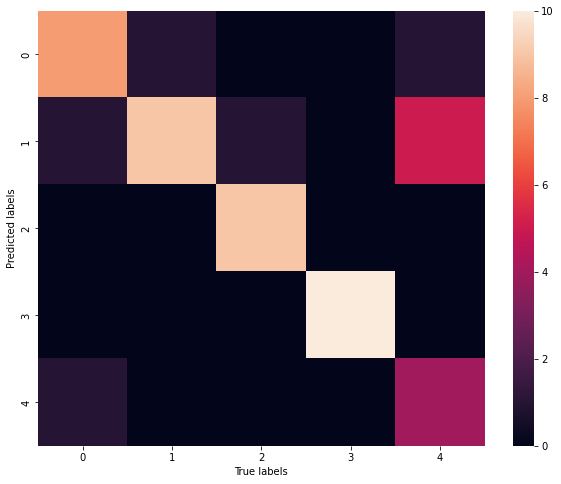

In [10]:
predictions_1 = model_1.predict(X_test)

# Compute the confusion matrix
cm_1 = confusion_matrix(np.argmax(Y_test, axis=-1), np.argmax(predictions_1, axis=-1))

# Compute the classification metrics
accuracy_1 = accuracy_score(np.argmax(Y_test, axis=-1), np.argmax(predictions_1, axis=-1))
precision_1 = precision_score(np.argmax(Y_test, axis=-1), np.argmax(predictions_1, axis=-1), average='macro')
recall_1 = recall_score(np.argmax(Y_test, axis=-1), np.argmax(predictions_1, axis=-1), average='macro')
f1_1 = f1_score(np.argmax(Y_test, axis=-1), np.argmax(predictions_1, axis=-1), average='macro')
print('Accuracy:',accuracy_1.round(4))
print('Precision:',precision_1.round(4))
print('Recall:',recall_1.round(4))
print('F1:',f1_1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_1.T)#, xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()